# USA HOUSE PRICE PREDICTION 

### Installing packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\User\\my_project\\Dsc\\Projects\\ML_Project_2'

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Remove address variable since it is not
#    a genuine variable to decide the cost

In [6]:
df = df.drop(columns='Address')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [8]:
#Data Preprocessing _ Handlingmissing values

df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


### Handling missing values
since 3 variables have missing values and missing data is less than 25% in all cases and they are float type we have to go with oulier detection

<AxesSubplot:ylabel='Avg. Area Income'>

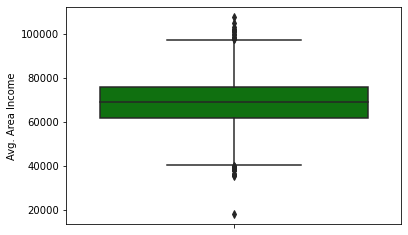

In [16]:
sns.boxplot(y = 'Avg. Area Income', data=df,color='g')

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

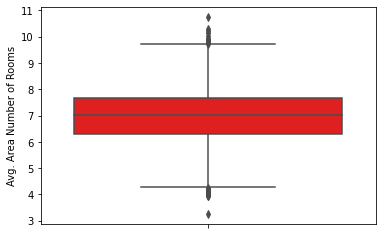

In [21]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data=df,color='r')

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

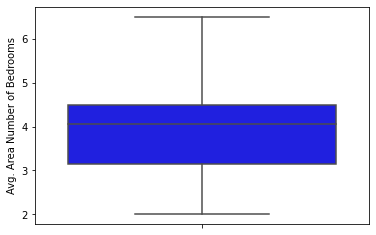

In [22]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data=df,color='b')

In [ ]:
# Avg. Area Income - outlier found - "Median"
# Avg. Area Number of Rooms - outlier not found since range is between 3 and 11 - "Median/Mean"
# Avg. Area Number of Bedrooms - no outlier found - "mean"

In [26]:
df['Avg. Area Income'] = df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())

In [23]:
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].mean())

In [24]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].mean())

In [27]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [28]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.145895,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10640.538021,0.991456,1.005435,1.233756,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002506,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [29]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

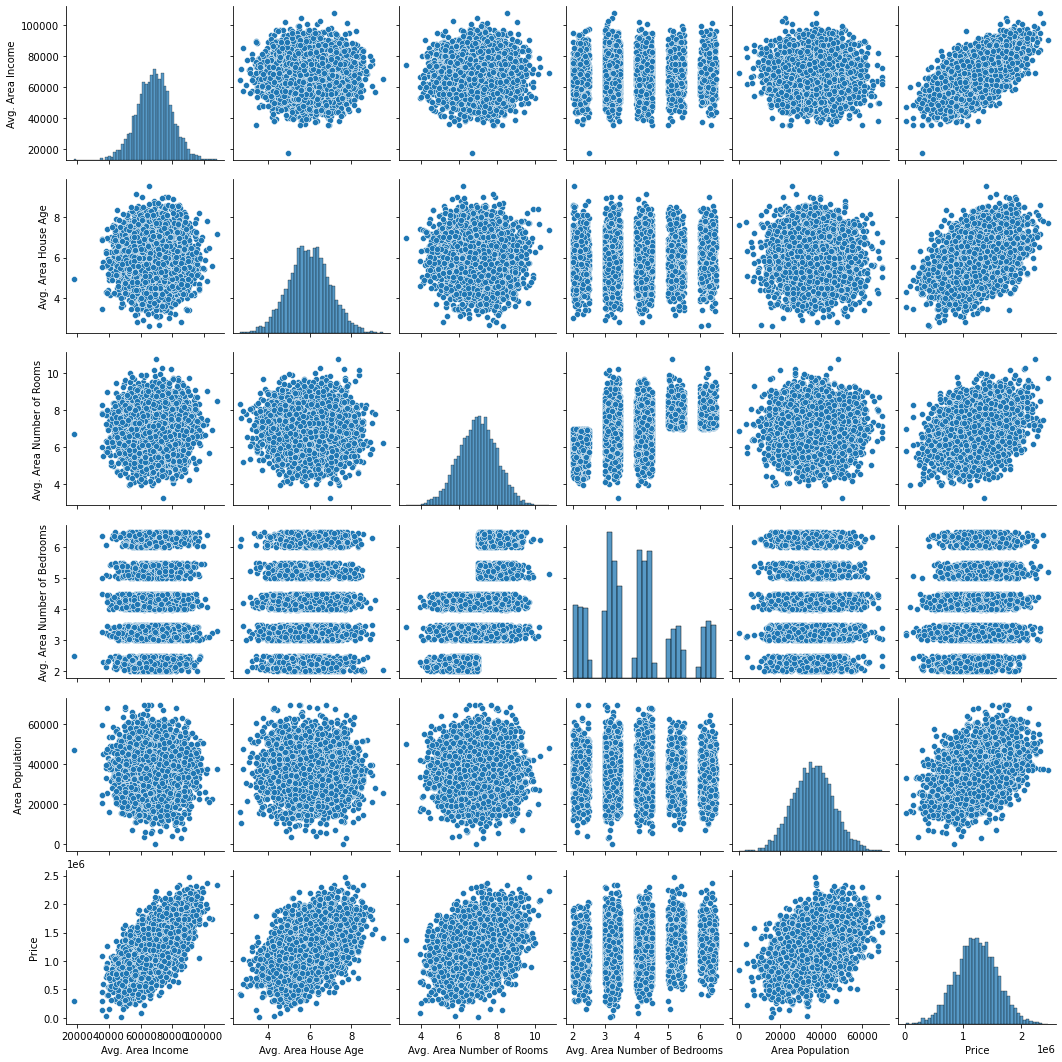

In [30]:
sns.pairplot(data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

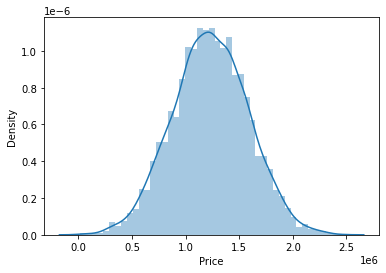

In [32]:
# Uni-variates
sns.distplot(df['Price'])

<AxesSubplot:>

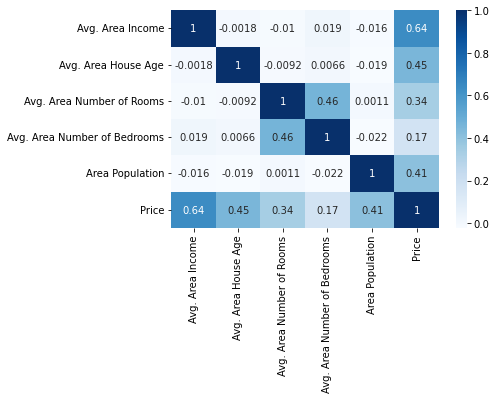

In [34]:
sns.heatmap(df.corr(),cmap='Blues',annot = True)

In [37]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [42]:
# split the data into independent variable and Dependent variable

x = df.iloc[:, 0:5]
#p = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']

In [43]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [44]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)                                                 
print(y_train.shape)
print(y_test.shape)

(3750, 5)
(1250, 5)
(3750,)
(1250,)


# Building Linear regression model

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [60]:
lm.intercept_

-2642926.099261363

In [61]:
lm.coef_

array([2.16472879e+01, 1.64965804e+05, 1.20984354e+05, 1.93879012e+03,
       1.52552385e+01])

In [64]:
coef_df = pd.DataFrame(lm.coef_, x.columns, columns=['coefficient'])
coef_df

,coefficient
Avg. Area Income,21.647288
Avg. Area House Age,164965.804052
Avg. Area Number of Rooms,120984.354442
Avg. Area Number of Bedrooms,1938.790124
Area Population,15.255238


# Predict the model with test data set

In [68]:
predictions = lm.predict(x_test)
predictions

array([1258403.86287943,  823238.522819  , 1740974.37262914, ...,
       1117224.01485822,  720601.67654188, 1517211.19076239])

In [75]:
predictions1 = lm.predict(x_train)
predictions1

array([ 975412.4900328 , 1006385.70945267, 1311341.3821929 , ...,
        976751.09122206,  923547.00129601, 2129601.91876928])

In [70]:
# find the loss function
# MAE
# MAPE
# MSE
# RMSE

In [71]:
from sklearn import metrics

In [72]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MSE :', metrics.mean_squared_error(y_test,predictions))
print('MAE :', metrics.mean_absolute_error(y_test,predictions))

RMSE : 102695.1300764402
MSE : 10546289741.416971
MAE : 82163.91092829664


# LR - OLS Method

In [91]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sm

In [94]:
OLS_mod = sm.OLS(endog = y_train, exog = x_train).fit()
OLS_mod

In [96]:
OLS_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.019e+04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:42:56   Log-Likelihood:                         -51805.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2054      0.312     32.751      0.000       9.594      10.816
Avg. Area House Age           4.911e+04   3459.801     14.195      0.000    4.23e+04    5.59e+04
Avg. Area Number of Rooms    -1.061e+04   3783.983     -2.804      0.005    -1.8e+04   -3190.984
Avg. Area Number of Bedrooms  4902.3356   3622.782      1.353      0.176   -2200.483     1.2e+04
Area Population                  8.5556      0.380     22.534      0.000       7.811       9.300
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.401
Skew:                          -0.004   Prob(JB):                        0.818
Kurtosis:                       2.950   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [85]:
reg_model = sf.OLS(endog = y_train, exog = x_train).fit()
reg_model

In [86]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.019e+04
Date:                Sun, 27 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:39:22   Log-Likelihood:                         -51805.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2054      0.312     32.751      0.000       9.594      10.816
Avg. Area House Age           4.911e+04   3459.801     14.195      0.000    4.23e+04    5.59e+04
Avg. Area Number of Rooms    -1.061e+04   3783.983     -2.804      0.005    -1.8e+04   -3190.984
Avg. Area Number of Bedrooms  4902.3356   3622.782      1.353      0.176   -2200.483     1.2e+04
Area Population                  8.5556      0.380     22.534      0.000       7.811       9.300
==============================================================================
Omnibus:                        0.350   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.401
Skew:                          -0.004   Prob(JB):                        0.818
Kurtosis:                       2.950   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# apart from accuracy (Adj r-square) and p-value

# Need to vrify below assumptions
# Assumption 
# 1) Data should be linear line - satisfied
# 2) there should not be any hetroscadicity - satisfied
# 3) there should not be any autocorrelation - satisfied
# 4) there should not be any multicollinearity - heatmap / vif - satisfid
# 5) select right endogenity - this is satisfied



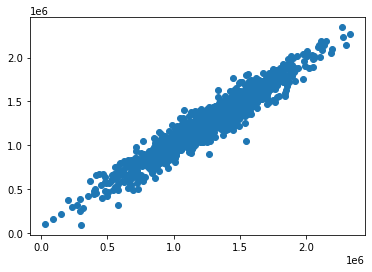

In [97]:
plt.scatter(y_test, predictions)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

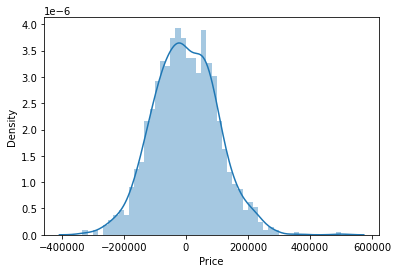

In [98]:
sns.distplot((y_test-predictions),  bins=50)

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y_test,predictions)

0.9156100401725175

In [103]:
r2_score(y_train,predictions1)

0.9170825045759827

In [108]:
New_House = pd.read_csv('New_House.csv')
New_House

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.45857,5.682861,7.009188,3.41,23086.80050,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.41,34310.24283,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,3.09,26354.10947,USNS Raymond\nFPO AE 09386
5,59982.19723,4.988408,2.500000,4.04,26748.42842,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,59982.19723,6.025336,6.730821,3.41,60828.24909,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,59982.19723,6.989780,3.780000,3.41,36516.35897,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59982.19723,5.362126,5.586729,3.09,29387.39600,USS Gilbert\nFPO AA 20957


In [110]:
New_House = New_House.drop(['Address'],axis=1)

In [111]:
New_House

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,3.41,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.41,34310.24283
4,59982.19723,5.040555,7.839388,3.09,26354.10947
5,59982.19723,4.988408,2.500000,4.04,26748.42842
6,59982.19723,6.025336,6.730821,3.41,60828.24909
7,59982.19723,6.989780,3.780000,3.41,36516.35897
8,59982.19723,5.362126,5.586729,3.09,29387.39600


# Predicting price of Houses using new data

In [113]:
prediction_NewHouse = lm.predict(New_House)
prediction_NewHouse

array([1223303.15919865, 1496029.97090512, 1253942.88901137,
       1120068.67162614,  843517.28267213,  196789.74561228,
       1398384.9353532 ,  829598.33112675,  670302.5090054 ])